# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


## <font color="darkorange"> Note teoriche
### Problemi di ottimizzazione e Monte Carlo variazionale
I **problemi di ottimizzazione** si basano sulla ricerca della miglior soluzione possibile ad un problema proposto. In fisica, una classe di problemi di questo tipo è rappresentata dai **problemi di minimizzazione**, che permettono di ricavare una forma approssimata del ground state di un sistema a molti corpi e studiarne le proprietà.

La risoluzione di tali problemi si basa sul **principio variaizonale**, che afferma che per qualunque funzione d'onda di prova $\psi_T$, l'energia variazionale $E_T$, ipotizzando un sistema descritto da hamiltoniana $\hat{H}$, sarà sempre maggiore o uguale dell'energia $E_0$ del ground state vero $\psi_0$:

$$
E_T = \frac{ \langle \psi_T | \hat{H} | \psi_T \rangle }{ \langle \psi_T | \psi_T \rangle } 
= \frac{ \int d\mathbf{r} \, \psi_T^*(\mathbf{r}) \hat{H} \psi_T(\mathbf{r}) }
       { \int d\mathbf{r} \, |\psi_T(\mathbf{r})|^2 }
\geq E_0 = \frac{ \langle \psi_0 | \hat{H} | \psi_0 \rangle }{ \langle \psi_0 | \psi_0 \rangle }
=\frac{ \int d\mathbf{r} \, \psi_0^*(\mathbf{r}) \hat{H} \psi_0(\mathbf{r}) }
       { \int d\mathbf{r} \, |\psi_0(\mathbf{r})|^2 }.
$$

L'uguaglianza sarà verificata solo se $\psi_T = \psi_0$. Per studiare lo stato fondamentale, si sceglie quindi una famiglia di funzioni d'onda $\psi_T(\bf{a})$, che dipende da una famiglia di parametri variazionali $\bf{a}$. Per ogni scelta di $\bf{a}$ si calcola l'energia $E_T(\bf{a})$, e la si minimizza numericamente rispetto al vettore di parametri variazionali $\bf{a}$. La scelta ottimale $\bf{a}^*$ rappresenta la miglior approssimazione dell'energia dello stato fondamentale nella famiglia scelta, cioè:

$$
E_T(\mathbf{a}^*) = \min_{\mathbf{a}} E_T(\mathbf{a})
$$

cui corrisponde la miglior approssimazione della funzione d'onda di ground state $\psi_T(\bf{a}^*)$.

In questo procedimento, la parte complessa è il calcolo dell'integrale multi-dimensionale per valutare l'energia dello stato scelto. In generale, il calcolo degli integrali necessari per valutare i valori di aspettazione delle osservabili, incluso il valore dell'energia totale, può essere effettuato struttando tecniche Monte Carlo, in particolare l'algoritmo di Metropolis. Questo metodo prende il nome di **Monte Carlo variazionale**. L'energia totale è definita dal seguente integrale:

$$
E_T = \frac{ \int d\mathbf{r}_1 \cdots d\mathbf{r}_N \, |\psi_T(\mathbf{r}_1, \ldots, \mathbf{r}_N)|^2 \, E_{\text{loc}}(\mathbf{r}_1, \ldots, \mathbf{r}_N) }{ \int d\mathbf{r}_1 \cdots d\mathbf{r}_N \, |\psi_T(\mathbf{r}_1, \ldots, \mathbf{r}_N)|^2 }
= \langle E_{\text{loc}} \rangle_{|\psi_T|^2}
$$

dove $ E_{\text{loc}}(\mathbf{r}_1, \ldots, \mathbf{r}_N) = \frac{ \hat{H} \psi_T }{ \psi_T }$ è l’energia locale (valore dell'energia istantanea per una certa configurazione di particelle), $|\psi_T|^2$ rappresenta la densità di probabilità associata alla configurazione e $\langle \cdot \rangle_{|\psi_T|^2}$ rappresenta la media statistica su tale distribuzione.

Stimando $E_T$ con l'algoritmo di Metropolis, il valore medio di energia ottenuto è **esatto**, entro l'incertezza statistica, e si ottiene il valore corretto di $E_T$ per la funzione di prova $\psi_T$ scelta.

Per formalizzare un problema di ottimizzazione, si consideri un vettore di $n$ parametri $\textbf{x} = (x_1, \ldots, x_n)$, ciascuno dei quali può assumere valori da un dominio continuo o discreto. Si vuole:

$$
\begin{aligned}
&\text{minimizzare } && L_1(x), \ldots, L_I(x), \quad x = (x_1, \ldots, x_n) \\
&\text{soggetto a } && h_j(x) = 0, \quad j = 1, \ldots, J \\
&                   && g_k(x) \leq 0, \quad k = 1, \ldots, K
\end{aligned}
$$

dove $L_1, \ldots, L_I$ rappresentano delle opportune **funzioni di costo/perdita**, $h_j$ e $g_k$ costituiscono degli opportuni **vincoli** di uguaglianza e disuguaglianza da soddisfare nell'ottimizzazione. Se non si hanno vincoli, si parla di **ottimizzazione non vincolata**.

Se $I = 1$, si parla di ottimizzazione a **singolo obiettivo**; se $I \geq 2$, si parla di problema di **ottimizzazione multi-obiettivo**.

In generale, la forma delle funzioni di costo e dei vincoli è piuttosto complicata, motivo per cui tali problemi in genere vengono risolti computazionalmente. Gli algoritmi di ottimizzazione possono essere di diversa natura:

- **Gradient-based / Derivative-free**: si distinguono a seconda che sfruttino o meno, rispettivamente, informazioni sulla derivata della funzione di costo o sui valori assunti dalla funzione di costo stessa;
  
- **Stocastici / Deterministici**: gli algoritmi stocastici prevedono componenti randomiche nella loro struttura, al fine di esplorare in modo efficace tutto lo spazio delle soluzioni possibili. Gli algoritmi deterministici, invece, seguono un percorso definito da opportune condizioni iniziali, e quindi sono perfettamente riproducibili.

- **Trajectory-based / Population-based**: nei primi si utilizza una singola soluzione, che viene aggiornata iterativamente, muovendosi nello spazio delle soluzioni possibili. Nei secondi si lavora invece con una popolazione di soluzioni che evolve nel tempo. Gli elementi della popolazione possono comunicare e interagire tra loro per migliorare la ricerca del'optimum.

- **Ricerca locale / Ricerca globale**: nella ricerca locale si parte da un’ipotesi iniziale e si esplora in modo iterativo lo spazio delle soluzioni vicine, al fine di individuare un optimum locale. Questi algoritmi sono spesso deterministici ed efficienti, ma una volta raggiunto un optimum locale, non riescono ad uscirne, impedendo così di trovare l’optimum globale. Al contrario, gli algoritmi di ricerca globale esplorano l’intero spazio delle soluzioni, anche lontano dalla configurazione iniziale, e sono in grado di uscire dai minimi locali. Infatti, sono integrati con una componente randomica per conservare la varietà delle soluzioni esplorate.
In alcuni casi, specie per funzioni costo o vincoli irregolari, è difficile che l'algoritmo raggiunga il minimo locale in un tempo finito. Di conseguenza, dopo un numero finito di mosse, è garantita la convergenza in un minimo locale (in alcuni casi, come funzioni di costo convesse, per le quali minimi locali sono anche minimi globali, la convergenza dell'algoritmo al minimo globale è garantita).

Una tecnica molto usata è l'algoritmo di **Gradient Descent (GD)**. Tale metodo si basa sull'idea che il gradiente della funzione di costo individui la sua direzione di massima crescita. Al fine di raggiungere il minimo, l'algoritmo prevede step fatti lungo la funzione di costo $L$ in direzione opposta al gradiente, cioè:

$$
\vec{x}_{n+1} = \vec{x_n} - \gamma \vec{\nabla} L(\vec{x_n})
$$

dove $\nabla L(x_n)$ è il gradiente della funzione di costo nel punto $x_n$, $\gamma$ prende il nome di **learning rate**, ed individua l'ampiezza del passo compiuto. Con questa logica $L(x_{n+1}) \leq L(x_n)$, e ci si avvicina al minimo della funzone di costo. Si parte quindi da un punto inziale $x_0$ scelto arbitrariamente, applicando l'algoritmo si ottiene una sequenza di punti $x_0, x_1, \dots x_n$ che definisce una successione monotona $L(x_0) \leq L(x_1) \leq \dots \leq L(x_n)$ che dovrebbe convergere al minimo. L'ampiezza di $\gamma$ è  fondamentale: step troppo piccoli rendono l'algoritmo lento; step troppo grandi potrebbero portare a evitare il minimo. In entrambi i casi l'algoritmo risulterebbe poco efficiente. 

Nel caso di ottimizzazione multi-obiettivo, si vuole ottimizzare la somma delle funzioni di costo:

$$
L(x) = \sum_{i=1}^{I} L_i(x).
$$

Questo può essere fatto con tecniche diverse:
- **Batch Gradient Descent (BGD)**: che consiste nell'applicazione del GD, calcolando il gradiente di ciascuna delle funzioni costo, se queste hanno una forma molto semplice, cioè:
  
$$
\vec{x}_{n+1} = \vec{x_n} - \gamma \vec{\nabla} L(\vec{x_n}) = \vec{x_n} - \sum_{i=1}^I\gamma \vec{\nabla} L_i(\vec{x_n}).
$$

- **Stochastig Gradient Descent**: se la forma delle funzioni di costo è complessa, il calcolo del gradiente si ciascuna di queste e la successiva somma può risultare computazionalmente inefficiente. Nel caso della SGD, viene scelta randomicamente una funzione costo e se ne calcola il gradiente, che viene utilizzato per approssimare il gradiente della funzione costo complessiva. In questo modo, l'algoritmo risulta più veloce ed efficiente. La funzione di costo con questa tecnica non decresce in maniera monotona, ma cresce e descresce in virtu della randomicità del metodo, diminuendo solo il media. Tale irregolarità è però utile per permettere all'algortmo di uscire da eventuali minimi locali.

- **Mini-Batch Stochastic Gradient Descent (Mini-Batch SGD)**: si calcola il gradiente partendo da un set di $M$ funzioni di costo scelte randomicamente:

$$
\vec{x_{n+1}} = \vec{x_n} - \gamma \sum_{i=1}^{M << I} \vec{\nabla} L_i(\vec{x_n})
$$

La convergenza all'optimum risulta più efficiente con SGD e Mini-Batch SGD. In questo caso, si utilizzano strumenti statistici per stimare i valori della funzione di costo, nonostante il rumore. Inoltre, grazie alla componente randomica, tali tecniche risultano inoltre utili per risolvere problemi di ottimizzazione in cui la funzione costo e i vincoli presentrano del rumore casuale. Talvolta l'introduzione di randomicità è utile anche nel caso di ottimizzaizone esatta, per velocizzare la convergenza dell'algoritmo.

Un altro metodo di ottimizzaizone randomica è la **random search**. Si generano casualmente delle soluzioni candidate; dopo un certo numero di iterazioni, la funzione che restituisce il miglior valore della funzione obiettivo è quella candidata a risolvere il problema. Questa tecnica è completamente randomica, in quanto non sfrutta informazioni sul problema nè si muove in modo regolare nello spazio delle soluzioni.

Questa tecnica è legata al cosiddetto **No Free Lunch Theorem**, che afferma che nessun algoritmo di ottimizzazione è migliore della random search se si considera lo spazio di tutti i possibili problemi. Se un algoritmo funziona bene per un certo sotto-insieme di problemi, non è detto che funzioni altrettanto bene su un'altra sotto-classe, sicuramente peggio di una random search. L'idea di fondo è che non esiste algoritmo di ottimizzazione universalmente migliore di altri, dipende dalla classe di problemi per cui sono progettati e adattati.

---

### Simulated annealing
Il **Simulated Annealing (SA)** è un algoritmo di ottimizzazione meta-euristico, basato sull'analogia con il raffreddamento di un sistema allo stato liquido. A temperatura $T$, le particelle si muovono in modo caotico, l'una indipendentemente dalle altre. Se la tempratura del sistema viene abbassata, si perde la mobilità termica e le particelle si organizzano in una struttura cristallina perfettamente ordinata in tutte le direzioni. Tale configurazione rappresenta uno stato di minima energia per il sistema, e viene naturalmente raggiunto se il raffredddamento avviene abbastanza lentamente, permettendo agli atomi di ridistribuirsi quando perdono mobilità. Se il raffreddamento avvenisse troppo rapidamente, le particelle si "congelerebbero" nella posizione in cui si trovano (configurazione a più alta energia), formando strutture poli-cristalline o amorfe. Questo processo di lento e graduale raffreddamento è detto **annealing**.

Ogni problema di ottimizzazzione può essere opportunamente posto in analogia con l'annealing, a patto di interpretare la funzione di costo $L(x)$ come l'energia di un sistema fisico e considerare la distribuzione di probabilità di Boltzmann:

$$
p(x) = \frac{\exp[-\beta L(x)]}{Z}
$$
dove $\beta = \frac{1}{T}$ è l'inverso della temperatura, e $Z$ è la funzione di partizione.

Quando $T \rightarrow 0$, la distribuzione $p(x)$ favorisce le configurazioni di energia minima del sistema, cioè corrispondenti alla regione del minimo globale (secondo l'analogia, ai valori di $x$ per cui la funzione di costo $L(x)$ è più bassa). Questo significa che, nel limite di temperatura zero, la distribuzione di Boltzmann permette di studiare la situazione in cui il sistema si ferma nei minimi globali di energia (nonchè di $L(x)$), recuperando quindi esattamente l’obiettivo dell’ottimizzazione globale del problema di partenza.

L'idea dell'algoritmo è quella di raffreddare gradualmente il sistema. Si definisce uno schema di raffreddamnto ${(\beta_1, n_1), (\beta_2, n_2), ..., (\beta_N, n_N)}$ e si sceglie una configurazione iniziale $x_0$ da cui partire. Per ogni temperatura $ T_i = 1/ \beta_i$, vengono eseguiti $n_i$ passi Monte Carlo, in cui si parte da una configurazione $x$ con energia $L(x)$, e si genera una nuova configurazione $x'$ con energia $L(x')$. Il sistema passa alla configurazione $x'$ con probabilità:

$$
P = 
\begin{cases}
e^{-\beta[L(x') - L(x)]} & \text{se } L(x') > L(x) \\
1 & \text{altrimenti}
\end{cases}
$$. 

Questa regola si può facilmente implementare usando l'algoritmo di Metropolis. Il risultato di ciascun ciclo sulla temperatura rappresenta il punto di partenza del ciclo successivo.

Nel caso di alte temperature, il peso di Boltzman $e^{-\beta [L(x') - L(x)]}$ è circa 1, per cui, anche se la mossa porta ad un aumento dell'energia, viene spesso accettata, favorendo l'esplorazione di tutte le configurazioni possibili. Al contrario, a basse temperature vengono accettate solo mosse favorevoli dal punto di vista energetico, che portano quindi il sistema allo stato di minima energia. In questo modo il sistema si stabilizza nella configurazione di minima energia, sperabilmente il minimo globale. Tale processo implementa una **catena di Markov tempo-dipendente**.

A causa del tempo finito di esecuzione dell'algoritmo, si arriva ad ottenere una configurazione prossima, ma non coincdente, al minimo globale, che si rivela soddisfacente nella maggior parte dei casi.

---

### Parallel tempering
Se la funzione di costo presenta molti minimi locali, può succedere che a bassa temperatura, il sistema rimanga bloccato in una configurazione metastabile, cioè un minimo locale.

Per ovviare al problema si realizza il cosiddetto **parallel tempering**: si fanno evolvere $n$ copie del sistema a diverse temperature. Le repliche ad alta temperatura esplorano lo spazio delle configurazioni in modo più libero, e riescono facilmente a uscire dai minimi locali; quelle a bassa temperatura, campionano bene la regione vicina ai minimi locali.

Con un certa periodicità e con probabilità generalmente determinata dalla regola di Metropolis, sistemi con temperatura simile scambiano le corrispondenti configurazioni. É conveniente scegliere configurazioni con temperatura simile poichè la probabilità di accettazione dello scambio è $P = min(1, e^{-(\beta_1 - \beta_2)[L(x') - L(x)]})$, per cui tanto più $\beta_1 - \beta_2 \sim 1$, cioè tanto più le temperature sono vicine, tanto più sarà probabile che lo scambio avvenga.

Questo metodo favorisce l'esplorazione: in generale, tra il minimo globale e quelli locali vi sono barriere energetiche che il sistema potrebbe superare solo se potesse salire energicamente, il che è molto improbabile se la temperatura è bassa. Tuttavia, effettuando lo scambio, la configurazione della replica a bassa temperatura passa a quella con temperatura maggiore, e siccome ad alte temperature l'esplorazione è più efficace, il sistema riesce facilmente a uscire da minimi locali.

Si facilita in questo modo la convergenza dell'algoritmo.

---

### Exercise 08.1

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

---

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### *Esercizio 08.1 - Soluzione proposta*
Per lo svolgimento di questo esercizio è stato scritto un codice che permette di ricavare il valore di aspettazione dell'hamiltoniana $\langle \hat{H} \rangle_T$, utilizzando l'algoritmo di Metropolis, seguendo la logica riportata nelle note teoriche dell'Esercitazione 5.

In particolare, l'integrale richiesto è scrivibile come:

$$
\langle \hat{H} \rangle_T  = \int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \int dx P(x) E^T_{loc}(x)
$$

dove:
- $E^T_{loc}(x) = \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)} = -\frac{1}{2} \frac{\psi_T''(x)}{\psi_T(x)} + V(x)$ è l’energia locale (valore dell'energia istantanea, somma di cinetica e potenziale, per una certa configurazione di particelle)

- $P(x) = \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}$ è la densità di probabilità associata alla funzione di prova $\psi_T(x)$.

Trattandosi di un integrale su una distribuzione di probabilità, analogo a quello stimato nell'Esercitazione 5, la stima è stata ottenuta secondo il metodo illustrato nell’Esercitazione 2. 

Le configurazioni su cui $E^T_{loc}(x)$ è valutata sono quelle campionate con l'algoritmo di Metropolis. Si campiona lo spazio delle configurazioni, proponendo una nuova posizione $x_{new} = x_{old} + \delta x$, dove $\delta x$ è un incremento casuale estratto da una distribuzione uniforme simmetrica, con intervallo di definizione scelto in modo da mantenere l'accettanza dell'algoritmo intorno al 50%, come dettato dalla regola empirica. La mossa è accettata con probabilità $P = min(1, \frac{|\psi^{\mu, \sigma}_T(x_{new})|^2}{|\psi^{\mu, \sigma}_T(x_{old})|^2})$.

I valori di $E^T_{loc}(x)$ vengono poi trattati con il metodo del data blocking, al fine di estrarre la stima di $\langle \hat{H} \rangle_T$ e della sua incertezza statistica. In particolare, gli $M$ passi totali vengono divisi in $N$ blocchi da $L = M/N$ steps. Tale metodo può essere usato:
1. per calcolare un singolo valore di aspettazione (media sui valori calcolati per ciascuno degli $N$ blocchi);
2. per riempire un vettore (vector) di dimensione $N$ per procedere al calcolo delle medie ed incertezze (deviazione standard della media) progressive;
3. per estrarre direttamente media e deviazione standard della media a partire dai valori degli $N$ blocchi (valori di coda del vector definito al punto 2.).

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### *Esercizio 08.2 - Soluzione proposta*
Per lo svolgimento di questo esercizio è stato implementato l’algoritmo di simulated annealing al fine di ottenere la coppia di parametri variazionali $(\mu,\sigma)$ che minimizza il valore di aspettazione dell’Hamiltoniana $\langle \hat H \rangle$. In tal modo si ricava una stima dell’energia di stato fondamentale del sistema.

Come specificato nella sezione teorica, è fondamentale che il raffreddamento avvenga in maniera estremamente lenta, così da garantire l’assestamento del sistema nella configurazione corrispondente al minimo globale. A tal fine, la temperatura è stata fatta scalare secondo la legge esponenziale:

$$
T_{\text{new}}=\alpha\,T_{\text{old}},
$$

con $\alpha = 0.99$. Il processo è iterato per 500 steps, partendo da temperatura iniziale $T_{\text{old}} = 1$, fino ad una temperatura  finale di $\approx 0.006$.

A partire dalla configurazione iniziale $(\mu_{\text{old}}, \sigma_{\text{old}}) = (1, 1)$ e $T_{\text{old}} = 1$, è stato stimato il valore iniziale dell’energia attesa $\langle \hat H \rangle_{\text{old}}$. Per ciascuna temperatura, si applica il metodo variazionale alla funzione d’onda di prova $\Psi_T^{\mu,\sigma}(x)$, variando i parametri $(\mu, \sigma)$ come:

$$
\mu_{\text{new}}=\mu_{\text{old}}+\delta\mu,\qquad
\sigma_{\text{new}}=\sigma_{\text{old}}+\delta\sigma,
$$

dove $\delta\mu \sim \mathcal{U}[-0.2, 0.2]$ e $\delta\sigma \sim \mathcal{U}[-0.2, 0.2]$.
Per ogni nuova coppia proposta si calcola il corrispondente valore dell’energia attesa $\langle \hat H \rangle_{\text{new}}$, che viene accettata con probabilità di Metropolis:

$$
P=\min\!\left(1,\; e^{-(E_{\text{new}}-E_{\text{old}})/T}\right),
$$

dove $E_{\text{old}} = \langle \hat H \rangle_{\text{old}}$ ed $E_{\text{new}} = \langle \hat H \rangle_{\text{new}}$.
Se la mossa è accettata, si aggiorna lo stato $(\mu_{\text{old}}, \sigma_{\text{old}}) \rightarrow (\mu_{\text{new}}, \sigma_{\text{new}})$; altrimenti si conserva la configurazione precedente.
Ad ogni temperatura, la procedura viene ripetuta 200 volte, partendo ogni volta dall'ultima configurazione salvata alla temperatura precedente.

La stima dei valori di aspettazione dell'hamiltoniana $\langle \hat H \rangle$ è ottenuta utilizzando il codice implementato nell’Esercizio 8.01 (modalità 1.), in cui lo spostamento $\delta x$ per il campionamento tramite Metropolis è estratto da una distribuzione uniforme $\mathcal{U}[-0.5, 0.5]$, in modo da rispettare la regola empirica sull’accettanza ottimale. Il numero di campionamenti è fissato a $M = 1.5 \cdot 10^4$, suddivisi in $N = 100$ blocchi da $L = M/N = 150$ campioni ciascuno.

Per ogni temperatura, per l'ultima coppia di parametri salvati $(\mu, \sigma)$, è stato stimato $\langle \hat{H} \rangle$ con relativa incertezza statistica, utilizzando la modalità 3. del codice implementato per l'Esercizio 8.01 (non è stato fatto per ogni variazione accettata dei parametri $(\mu, \sigma)$ in modo da non appesantire l'output grafico). Il numero di blocchi $N$ e di campionamenti $M$ è rimasto invariato rispetto a prima.

Nel grafico seguente si riportano tali valori in funzione della temperatura del sistema $T$. L'asse delle tempeature è riportato invertito, così da mostrare come, procedendo con l'annealing, l'energia del ground state si avvicini sempre di più a quella attesa.

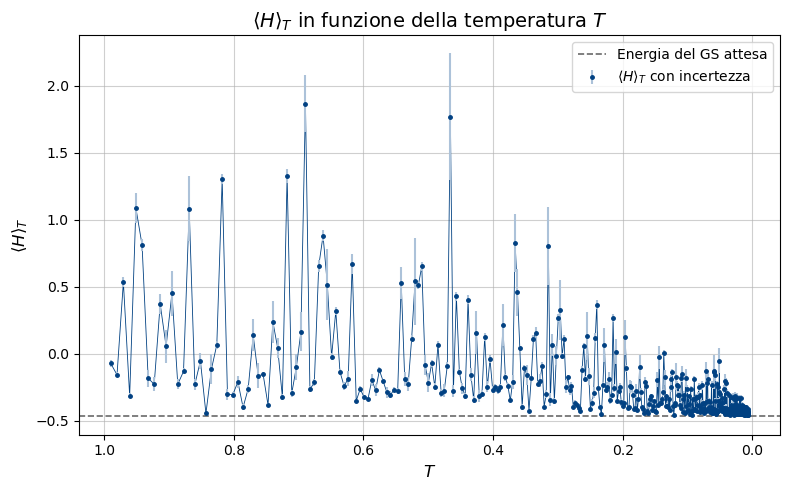

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 

data = np.loadtxt("Es8.1-2/H_vs_temperature.dat")
T = data[:, 0] 
H = data[:, 1] 
err = data[:, 2] 

T_inv = T[::-1]
H_inv = H[::-1] 
err_inv = err[::-1] 

H_expected = -0.46046587969259045

plt.figure(figsize=(8,5))

plt.plot(T_inv, H_inv, '-', linewidth=0.6, color='xkcd:darkish blue', label=None) 
plt.errorbar(T_inv, H_inv, yerr=err_inv, fmt='.', markersize=5, color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label=r'$\langle H \rangle_T$ con incertezza') 
plt.gca().invert_xaxis() 

plt.xlabel(r'$T$', fontsize=12) 
plt.ylabel(r'$\langle H \rangle_T$', fontsize=12) 
plt.axhline(y=H_expected, color='dimgray', linestyle='--', linewidth=1.2, label='Energia del GS attesa') 
plt.title(r'$\langle H \rangle_T$ in funzione della temperatura $T$', fontsize=14) 
plt.grid(True, alpha=0.6) 

plt.legend() 
plt.tight_layout() 
plt.show()

Durante l'ottimizzazione, il programma salva progressivamente il miglior valore di energia trovato, $E_{\text{best}}$, insieme ai parametri ottimali corrispondenti, $(\mu_{\text{best}}, \sigma_{\text{best}})$. Al termine del processo di raffreddamento, vengono restituiti:

- $E_{\text{best}} = -0.465195$
- $\mu_{\text{best}} = -0.808268$
- $\sigma_{\text{best}} = 0.656349$

ottenuti a temperatura $T = 0.0887323$.

Utilizzando i parametri ottimali, è stata ricavata una stima del valor medio dell’hamiltoniana $\langle \hat{H} \rangle_T$ attraverso il codice sviluppato nell’Esercizio 8.1, modalità 2. In particolare, sono stati eseguiti $N = 4 \cdot 10^4$ campionamenti, suddivisi in $M = 100$ blocchi da $L = N/M = 400$ passi ciascuno. Per il campionamento della funzione d’onda è stato adottato uno step di integrazione uniforme, estratto da $\mathcal{U}[-0.7, 0.7]$.

Di seguito è riportato l’andamento di $\langle \hat{H} \rangle_T$ con relativa incertezza in funzione del numero di blocchi considerati.

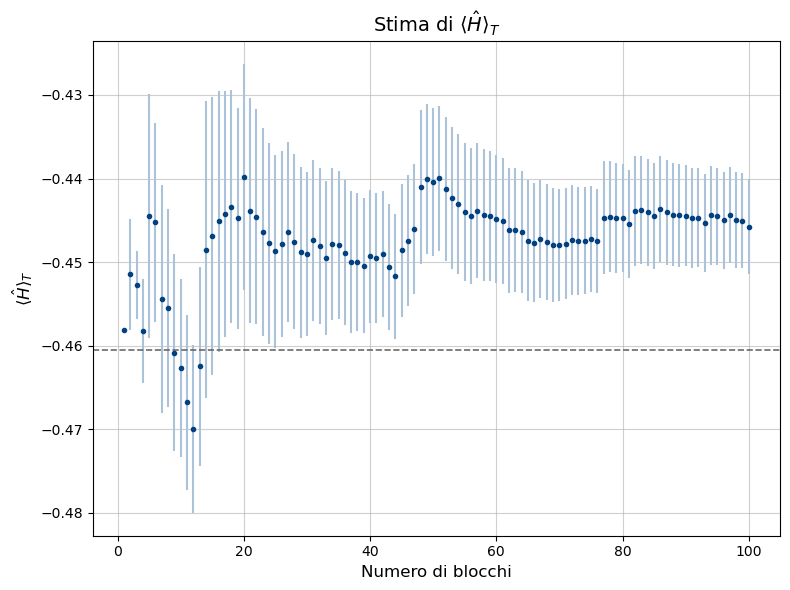

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x, y, error = np.loadtxt("Es8.1-2/E_optimal_values.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)
H_expected = -0.46046587969271513

plt.figure(figsize=(8, 6))

plt.errorbar(x, y, yerr=error, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue')
plt.axhline(y=H_expected, color='dimgray', linestyle='--', linewidth=1.2, label='Energia del GS attesa')

plt.title(r'Stima di $\langle \hat{H} \rangle_T$', fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\langle \hat{H} \rangle_T$', fontsize=12)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()


Di seguito si riportano le configurazioni campionate nello spazio dei parametri $(\mu, \sigma)$, da quella inziale $(\mu, \sigma) = (1, 1)$ a quella finale, nel corso dell'annealing. Per rendere più veloce l'esecuzione del codice, sono salvati solo gli ultimi valori accettati a ciascuna temperatura.

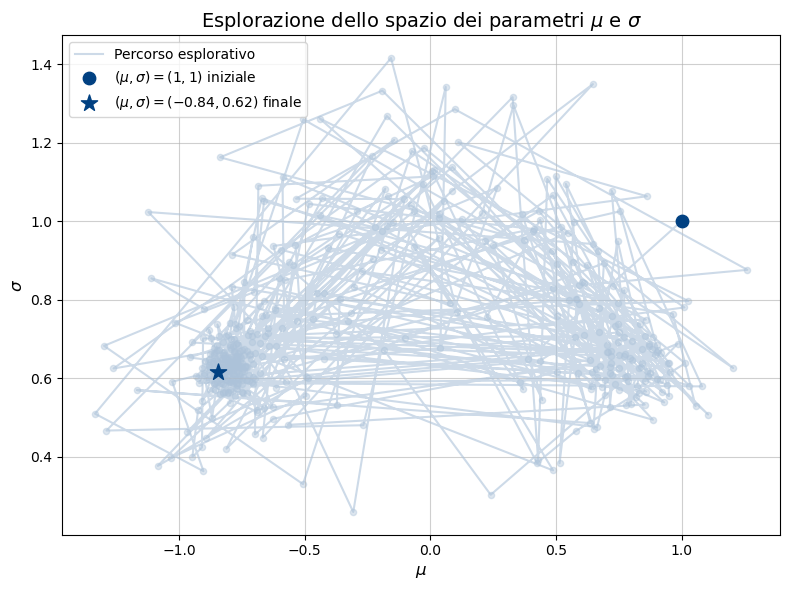

In [26]:
import numpy as np
import matplotlib.pyplot as plt

params = np.loadtxt("Es8.1-2/accepted_mu_sigma.dat")
mu = params[:, 0]
sigma = params[:, 1]

p_inizio = (mu[0], sigma[0])
p_finale = (mu[-1], sigma[-1])

plt.figure(figsize=(8, 6))

plt.plot(mu, sigma,
         color='xkcd:cloudy blue', alpha=0.6,
         linestyle='-', marker='', label=r'Percorso esplorativo')

plt.scatter(mu[1:-1], sigma[1:-1],
            color='xkcd:cloudy blue', marker='o', s=20, label='_nolegend_', alpha=0.4)

plt.scatter(*p_inizio,
            color='xkcd:darkish blue', marker='o', s=80, zorder=10,
            label=r'$(\mu, \sigma) = (1, 1)$ iniziale')

plt.scatter(*p_finale,
            color='xkcd:darkish blue', marker='*', s=150, zorder=10,
            label=r'$(\mu, \sigma) = (-0.84, 0.62)$ finale')

plt.xlabel(r'$\mu$', fontsize=12)
plt.ylabel(r'$\sigma$', fontsize=12)
plt.title(r'Esplorazione dello spazio dei parametri $\mu$ e $\sigma$', fontsize=14)

plt.legend()
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()


Infine, si riporta il confronto tra la soluzione analitica corrispondente alla funzione d’onda calcolata con i parametri $(\mu_{\text{best}}, \sigma_{\text{best}})$, la distribuzione campionata tramite l’algoritmo di Metropolis, e la soluzione numerica ottenuta risolvendo l’equazione di Schrödinger nella forma matriciale.
L’obiettivo del confronto è verificare la coerenza tra le distribuzioni analitica e numerica, per confermare la validità del metodo di ottimizzazione.

Ground state energy:  -0.46046587969259045


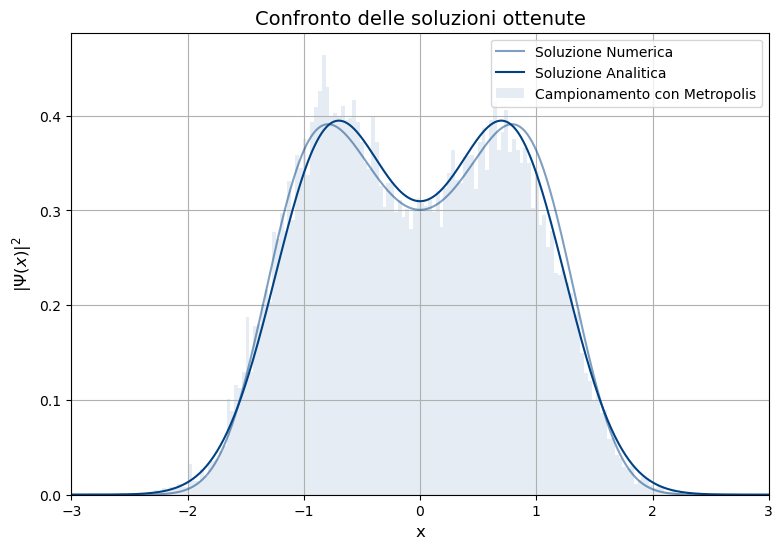

In [28]:
import numpy as np
import matplotlib.pyplot as plt

best_mu=-0.808268
best_sigma=0.656349


def Vpot(x):
    return (x**2 - 2.5)*x**2

def PsiSquare(x):
    return (np.exp(-(x-best_mu)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mu)**2/(2.0 * best_sigma**2)))**2

    
hbar = 1
m = 1
a = 10
N = 1000 

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] 
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

E,psi = np.linalg.eigh(H)

psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
 
plt.figure(figsize=(9,6))
scale = 0.3

plt.plot(x,(psi[0])**2, label='Soluzione Numerica', color='xkcd:darkish blue', alpha=0.5)
plt.plot(x, PsiSquare(x)/( a*np.mean(PsiSquare(x)) ), color = 'xkcd:darkish blue', alpha=1, label="Soluzione Analitica")

histo_data = np.loadtxt("Es8.1-2/sampled_configurations_x.dat")

plt.hist(histo_data, bins=150, density=True, alpha=0.3, color='xkcd:cloudy blue', label='Campionamento con Metropolis')

plt.title("Confronto delle soluzioni ottenute", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel(r'$|\Psi(x)|^2$', fontsize=12)
plt.grid(True)
plt.xlim((-3,3))
plt.legend()
plt.show()

Si osserva una buona compatibilità tra le distribuzioni.